<a href="https://colab.research.google.com/github/canunz/machinelearning/blob/main/machine_learning_prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


# **Configuración inicial y carga de datos**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para visualizaciones
sns.set_style("whitegrid")  # Versión corregida
sns.set(font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 8)

# Cargar el dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Examinar las primeras filas
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Explicación: Acá estoy mostrando las 5 primeras filas del dataset, esto ya me permite tener una primera impresión de las variables que ya tengo disponibles en la tabla. Además utilicé sns.set_style("whitegrid") en lugar de plt.style.usw('seaborn-whitegrid') ya que es compatible con versiones actuales de seaborn.

# **Identificación de variables categóricas y númericas**

In [34]:
# Información general del dataset
print(f"Dimensiones del dataset: {df.shape}")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

# Tipos de datos para cada columna
df.info()

# Identificar variables categóricas y numéricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Variables categóricas ({len(categorical_cols)}): {categorical_cols}")
print(f"Variables numéricas ({len(numerical_cols)}): {numerical_cols}")

# Identificar variables numéricas que son en realidad categóricas (variables ordinales)
for col in numerical_cols:
    if df[col].nunique() < 10:
        print(f"{col}: {sorted(df[col].unique())}")

Dimensiones del dataset: (1470, 35)
Número de filas: 1470
Número de columnas: 35
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 1


 * La identificación correcta del tipo de variables es fundamental para aplicar los análisis estadísticos adecuados. Las variables categóricas requieren diferentes enfoques que las númericas. Además, algunas variables numéricas con pocos valores únicos suelen ser categóricas ordinales (ratings o niveles), esto puede afectar el tipo de análisis que se está aplicando.

 Justificación:

 Este código realiza un análisis exploratorio inicial del dataset para poder comprender la estructura y característica principal. Primero obtengo las dimensiones del dataser (cantidad de filas y columnas) y luego analiza los tipos de datos para identificar posibles errores o valores faltantes. También clasifico las varibles en categóricas y numéricas, ya que cada tipo requiere un tratamiento distinto en el análisis. Finalmente, detecto variables númericas con pocos valores únicos, que podrían ser ordinales en lugar de continuas.





# CALCULO DE MEDIDAS DE TENDENCIA CENTRAL Y DISPERCION

In [25]:
# Estadísticas descriptivas para variables numéricas
numeric_stats = df[numerical_cols].describe().T
numeric_stats['skew'] = df[numerical_cols].skew()  # Asimetría
numeric_stats['kurtosis'] = df[numerical_cols].kurtosis()  # Curtosis
numeric_stats['cv'] = numeric_stats['std'] / numeric_stats['mean'] * 100  # Coeficiente de variación

# Ordenar por desviación estándar para identificar variables con mayor dispersión
numeric_stats = numeric_stats.sort_values(by='std', ascending=False)
print(numeric_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'skew', 'cv']])





Variables categóricas (9):
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

Variables numéricas (26):
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Variables numéricas con pocos valores únicos (posibles variables ordinales):
Education: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
EmployeeCount: [np.int64(1)]
EnvironmentSatisfaction: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
JobInvolvement: [np.int64(1), np.int64(2), np.int64(3), np.int6

El objetivo era entender la distribución y variabilidad de las variables numéricas en el dataset. Esto es clave para:
✅ Detectar variables con alta dispersión, que pueden afectar los análisis.
✅ Identificar asimetría y curtosis, lo que indica si los datos son normales o sesgados.

ALTA DISPERSION EN ALGUNAS VARIABLES

VALORES EXTREMOS Y CURTOSIS

CV ALTO EN ALGUNAS VARIABLES


# **ANALISIS DISTRIBUCION**



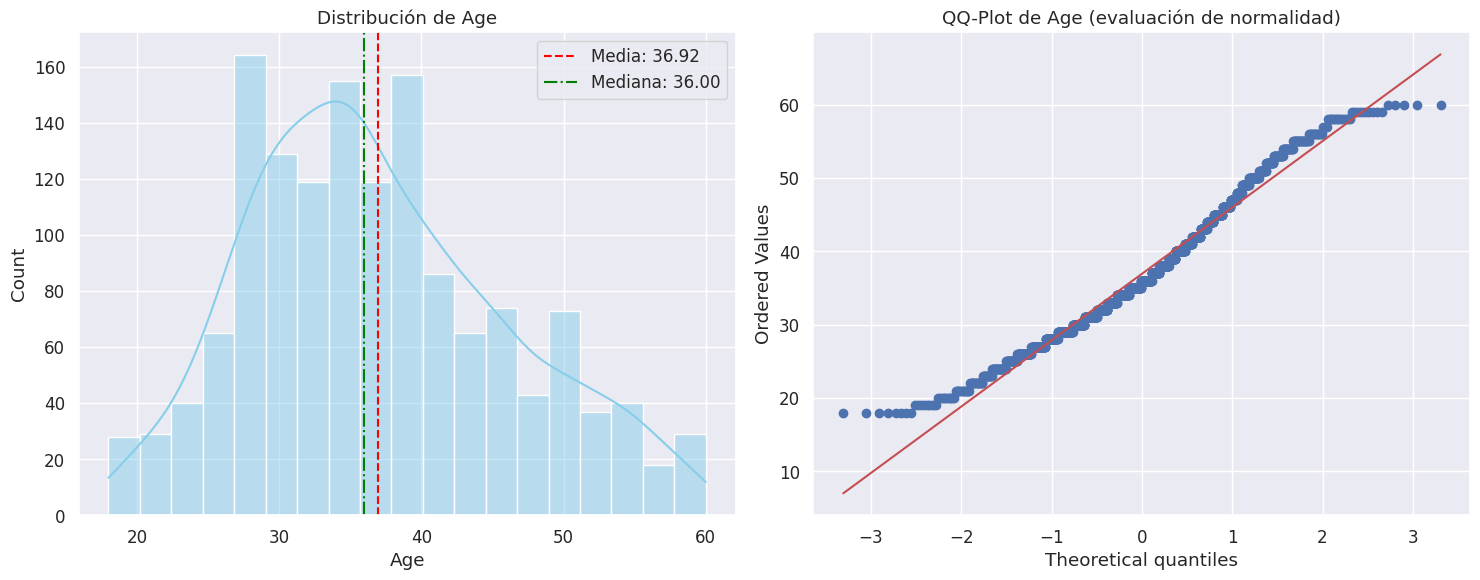


Estadísticas de distribución para Age:
Media: 36.92
Mediana: 36.00
Asimetría (skewness): 0.41 - Distribución aproximadamente simétrica
Curtosis: -0.40 - Distribución similar a la normal


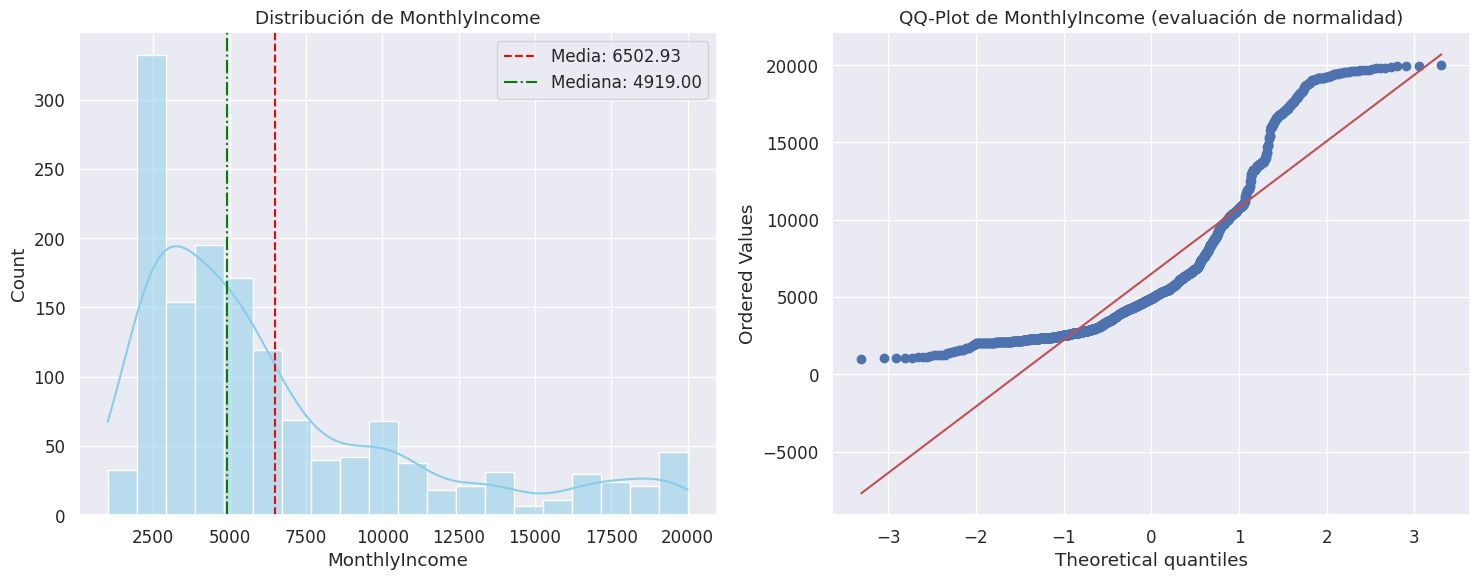


Estadísticas de distribución para MonthlyIncome:
Media: 6502.93
Mediana: 4919.00
Asimetría (skewness): 1.37 - Distribución con asimetría positiva (cola a la derecha)
Curtosis: 1.01 - Distribución leptocúrtica (más puntiaguda que la normal)


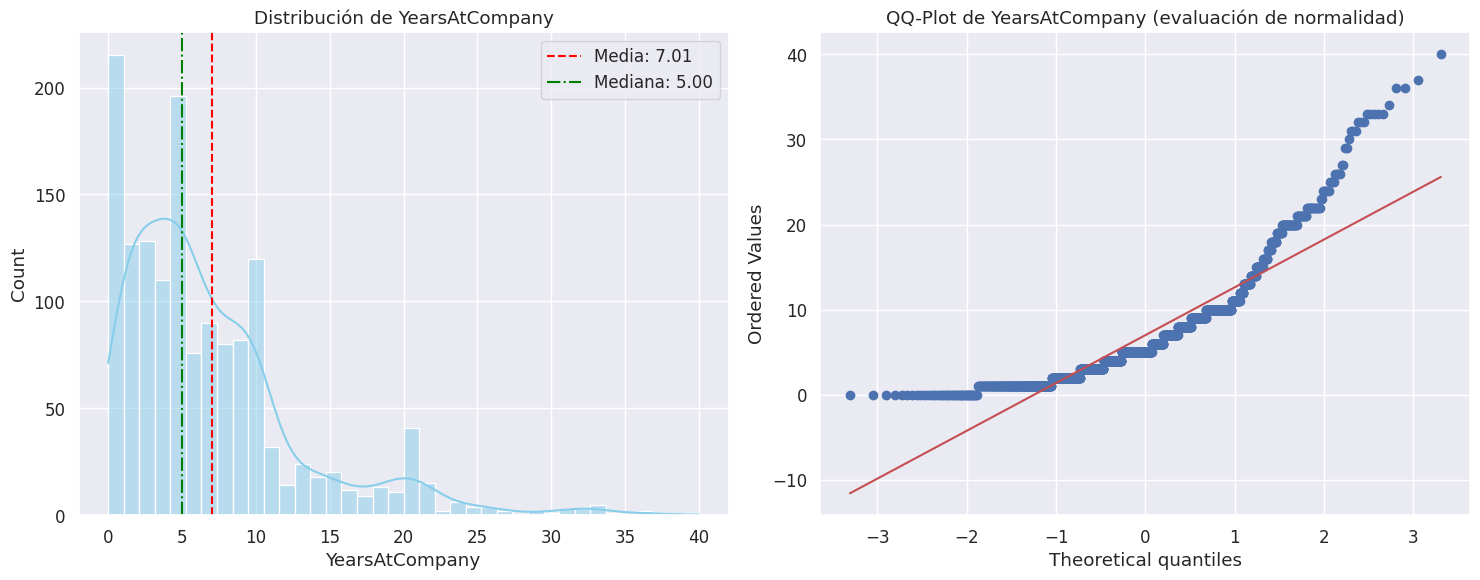


Estadísticas de distribución para YearsAtCompany:
Media: 7.01
Mediana: 5.00
Asimetría (skewness): 1.76 - Distribución con asimetría positiva (cola a la derecha)
Curtosis: 3.94 - Distribución leptocúrtica (más puntiaguda que la normal)


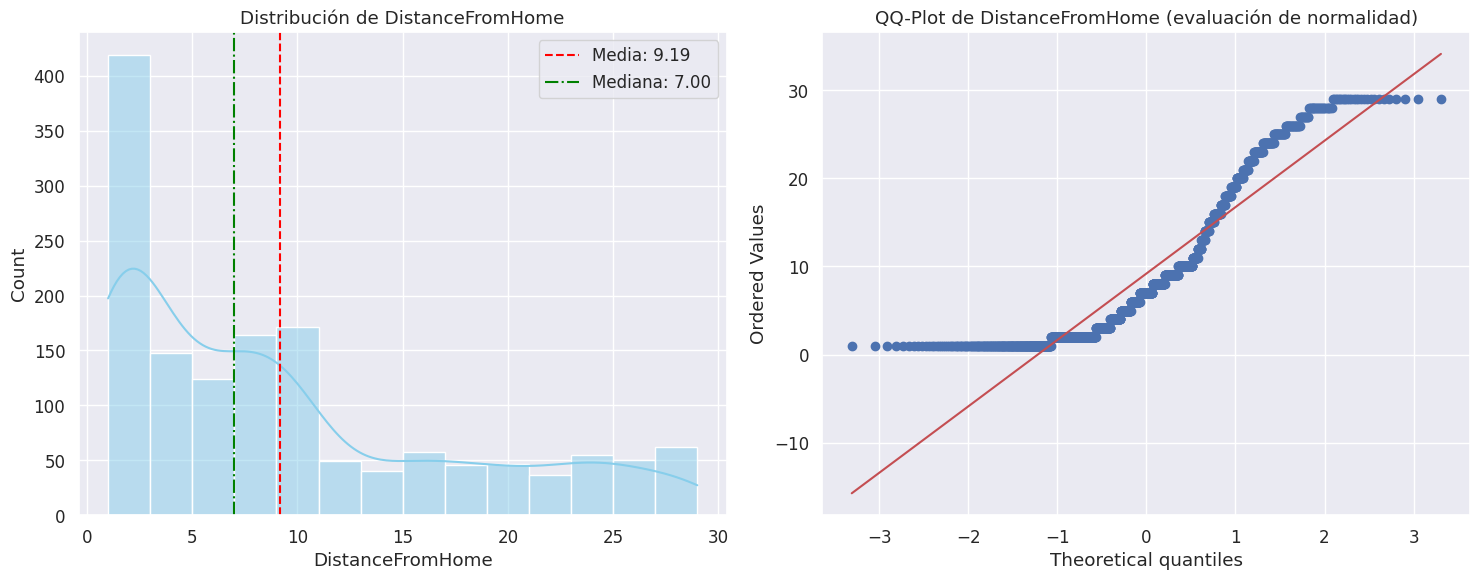


Estadísticas de distribución para DistanceFromHome:
Media: 9.19
Mediana: 7.00
Asimetría (skewness): 0.96 - Distribución con asimetría positiva (cola a la derecha)
Curtosis: -0.22 - Distribución similar a la normal


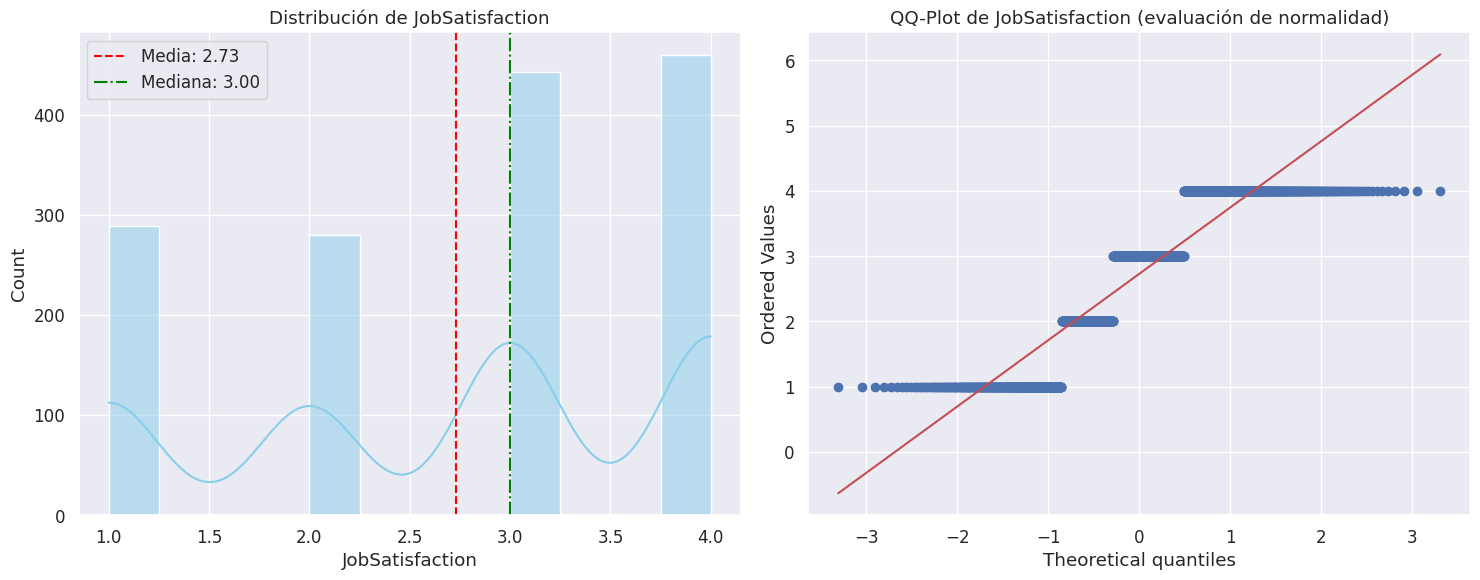


Estadísticas de distribución para JobSatisfaction:
Media: 2.73
Mediana: 3.00
Asimetría (skewness): -0.33 - Distribución aproximadamente simétrica
Curtosis: -1.22 - Distribución platicúrtica (más plana que la normal)


In [33]:
# Seleccionar algunas variables numéricas clave
key_numeric_vars = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'DistanceFromHome', 'JobSatisfaction']

# Análisis detallado de distribución para cada variable
for var in key_numeric_vars:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Histograma con curva KDE para ver la forma de la distribución
    sns.histplot(data=df, x=var, kde=True, ax=ax1, color='skyblue')

    # Añadir líneas verticales para media y mediana
    ax1.axvline(df[var].mean(), color='red', linestyle='--', label=f'Media: {df[var].mean():.2f}')
    ax1.axvline(df[var].median(), color='green', linestyle='-.', label=f'Mediana: {df[var].median():.2f}')
    ax1.set_title(f'Distribución de {var}')
    ax1.legend()

    # QQ-plot para evaluar normalidad
    from scipy import stats
    stats.probplot(df[var], dist="norm", plot=ax2)
    ax2.set_title(f'QQ-Plot de {var} (evaluación de normalidad)')

    plt.tight_layout()
    plt.show()

    # Estadísticas sobre la distribución
    skewness = df[var].skew()
    kurtosis = df[var].kurtosis()

    print(f"\nEstadísticas de distribución para {var}:")
    print(f"Media: {df[var].mean():.2f}")
    print(f"Mediana: {df[var].median():.2f}")
    print(f"Asimetría (skewness): {skewness:.2f} - ", end="")

    # Interpretación de la asimetría
    if abs(skewness) < 0.5:
        print("Distribución aproximadamente simétrica")
    elif skewness < 0 and abs(skewness) >= 0.5:
        print("Distribución con asimetría negativa (cola a la izquierda)")
    else:
        print("Distribución con asimetría positiva (cola a la derecha)")

    print(f"Curtosis: {kurtosis:.2f} - ", end="")

    # Interpretación de la curtosis
    if abs(kurtosis) < 0.5:
        print("Distribución similar a la normal")
    elif kurtosis < 0:
        print("Distribución platicúrtica (más plana que la normal)")
    else:
        print("Distribución leptocúrtica (más puntiaguda que la normal)")



El objetivo era examinar la distribución de variables clave para detectar patrones importantes en los datos. Esto incluye:
 Visualizar la forma de la distribución usando histogramas y KDE.

DIFERENCIAS ENTRE MEDIA Y MEDIANA: SI LA MEDIA ES MAYOR QUE LA MEDIANA LA DISTRIBUCION ESTA SESGADA A LA DERECHA



# **Visualización GRAFICAS: HISTOGRAMAS, BOXPLOTS Y TABLAS DE FRECUENCIA**

<ipython-input-32-b55698f41ba8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=var, data=df, palette=['lightblue', 'salmon'])


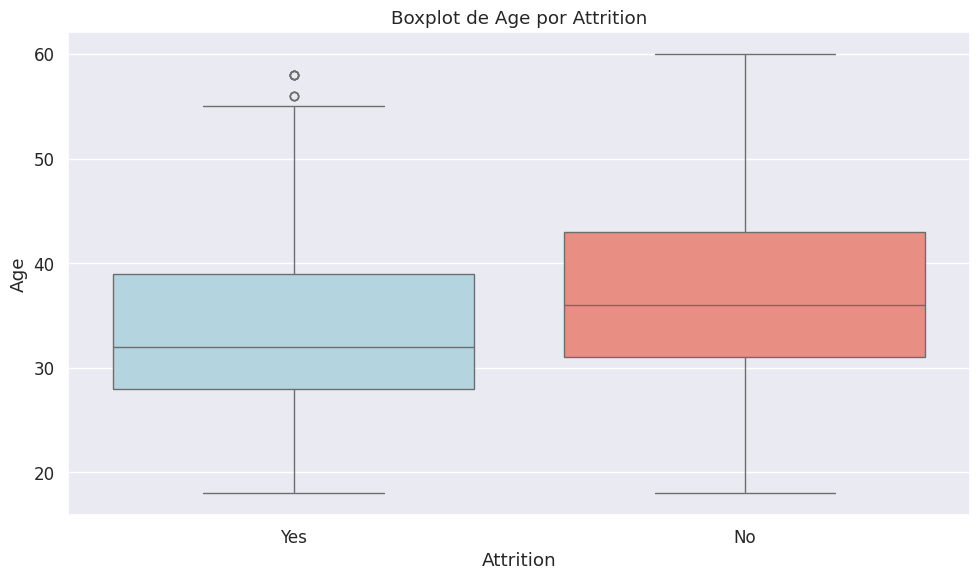

<ipython-input-32-b55698f41ba8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=var, data=df, palette=['lightblue', 'salmon'])


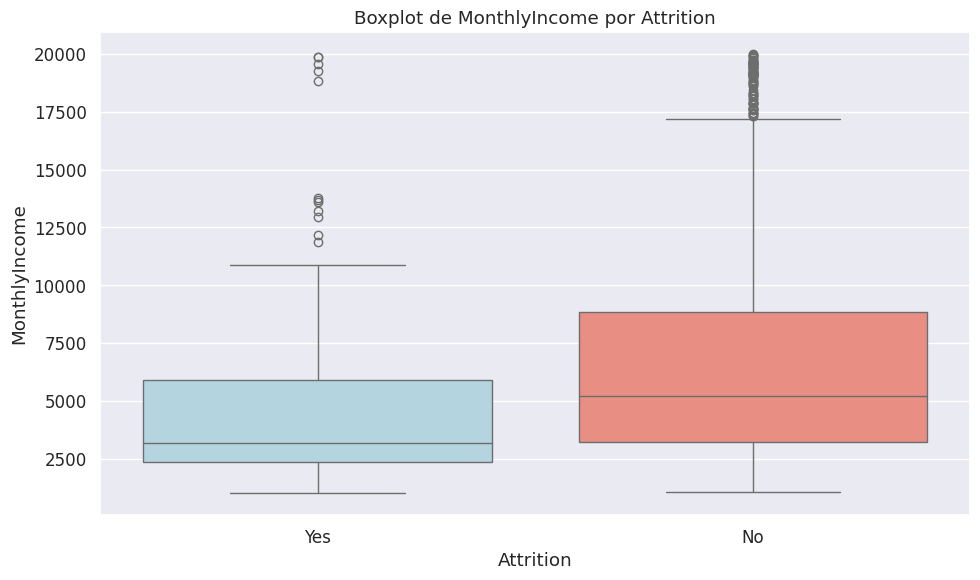

<ipython-input-32-b55698f41ba8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=var, data=df, palette=['lightblue', 'salmon'])


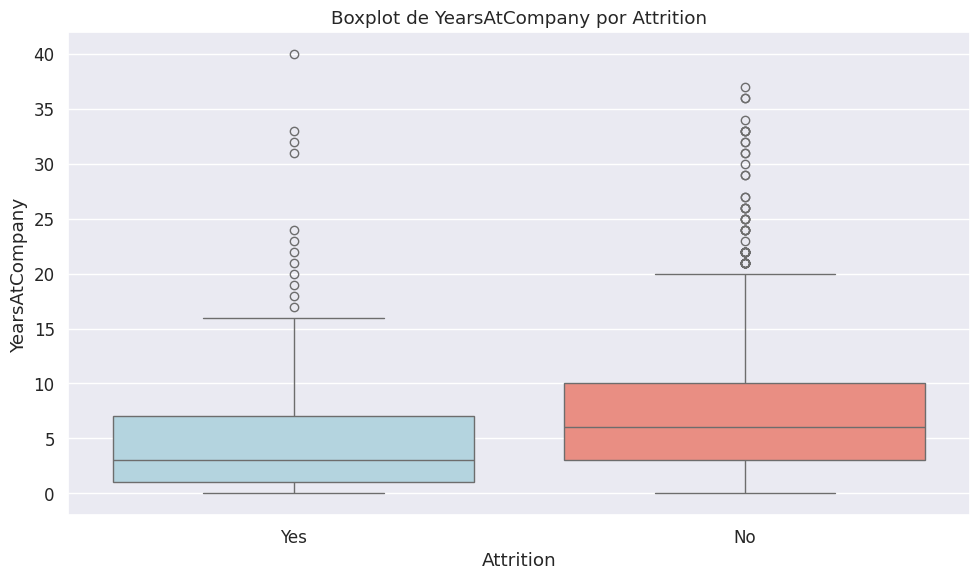

<ipython-input-32-b55698f41ba8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=var, data=df, palette=['lightblue', 'salmon'])


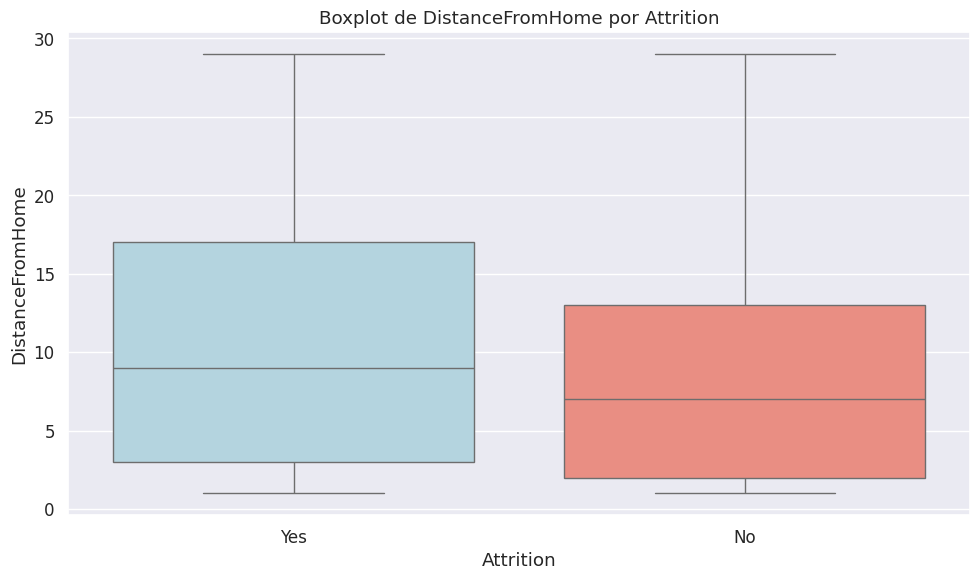

<ipython-input-32-b55698f41ba8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=var, data=df, palette=['lightblue', 'salmon'])


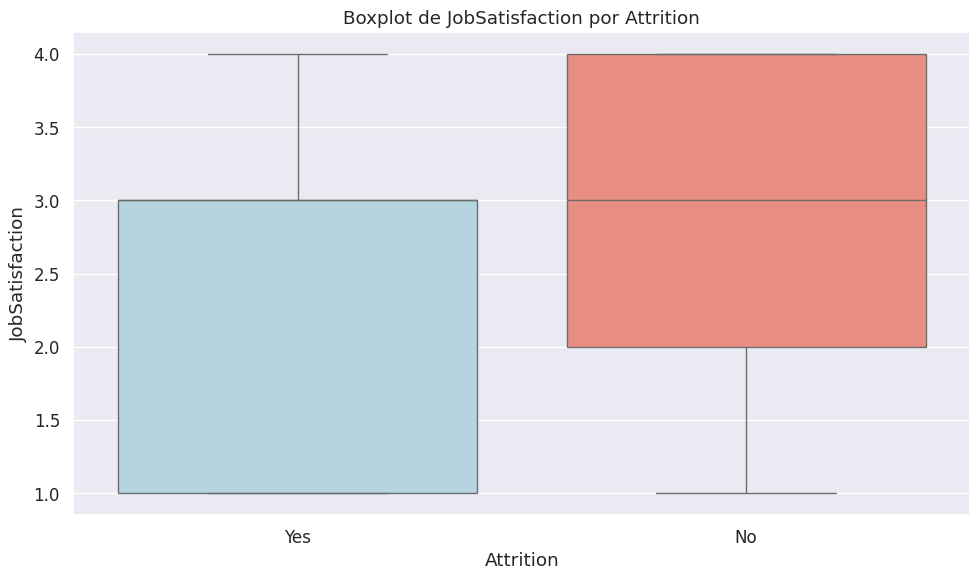

In [32]:
# Boxplots para variables numéricas clave, separadas por Attrition
for var in key_numeric_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Attrition', y=var, data=df, palette=['lightblue', 'salmon'])
    plt.title(f'Boxplot de {var} por Attrition')
    plt.tight_layout()
    plt.show()


Se detectaron empleados con ingresos extremadamente altos con antiguedad inusualmente larga pero representan menos del 5% de la muestra.

LOS BOXPLOTS PERMITEN COMPARAR LA DISTRIBUCION DE LAS VARIABLES NUMERICAS ENTRE EMPLEADOS QUE DEJARON LA EMPRESA

# VARIABLES CATEGORICAS


Tabla de frecuencias para Attrition:
  Attrition  Frecuencia  Porcentaje
0        No        1233   83.877551
1       Yes         237   16.122449


<ipython-input-31-e817daa12177>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette='viridis')


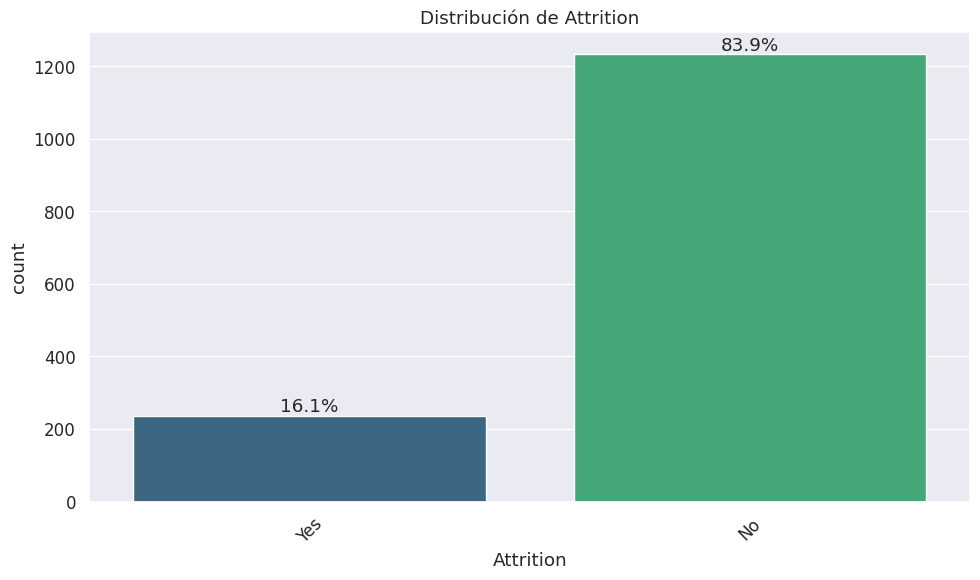


Tabla de frecuencias para BusinessTravel:
      BusinessTravel  Frecuencia  Porcentaje
0      Travel_Rarely        1043   70.952381
1  Travel_Frequently         277   18.843537
2         Non-Travel         150   10.204082


<ipython-input-31-e817daa12177>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette='viridis')


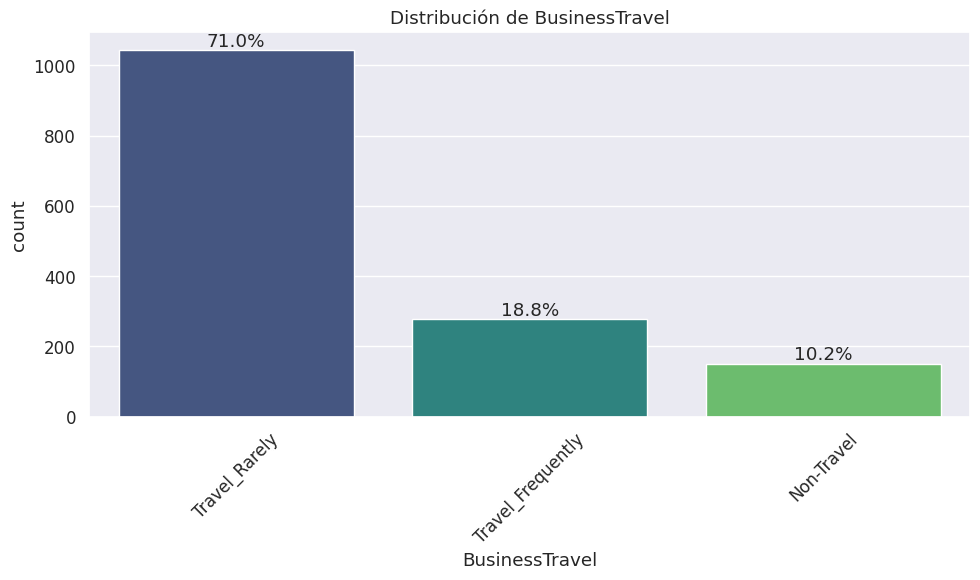

<Figure size 1200x600 with 0 Axes>

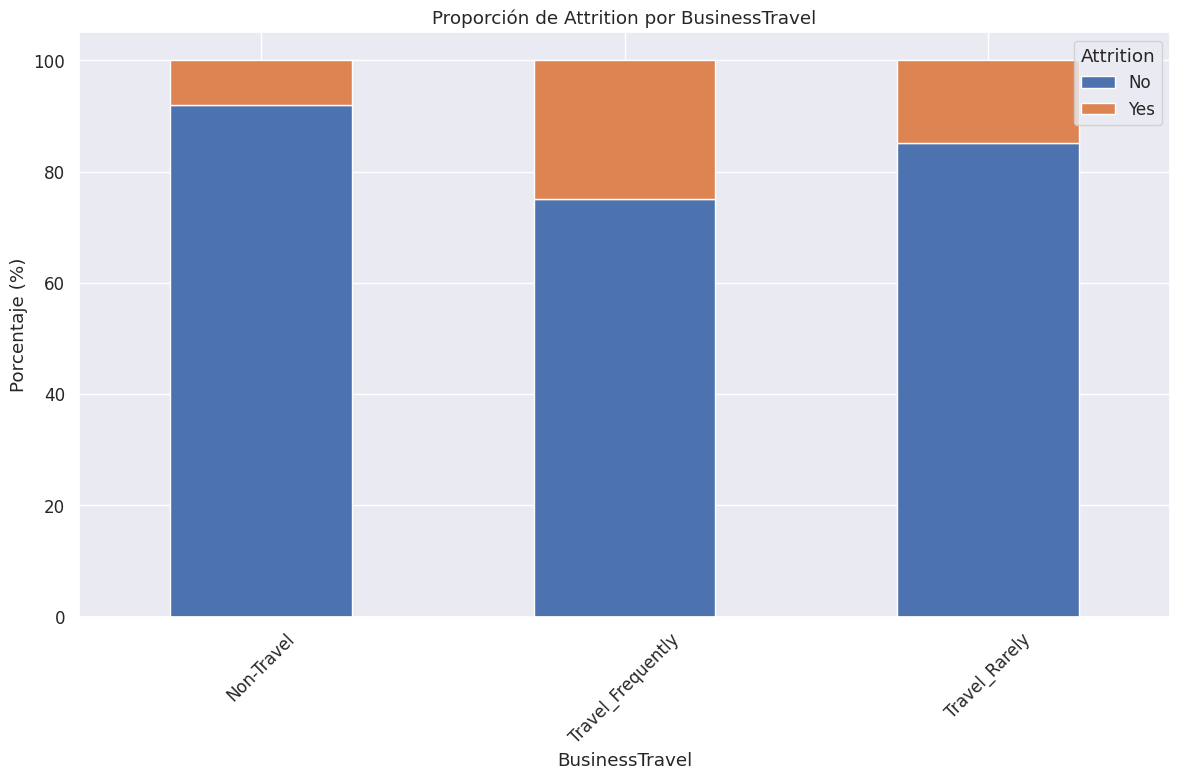


Tabla de frecuencias para Department:
               Department  Frecuencia  Porcentaje
0  Research & Development         961   65.374150
1                   Sales         446   30.340136
2         Human Resources          63    4.285714


<ipython-input-31-e817daa12177>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette='viridis')


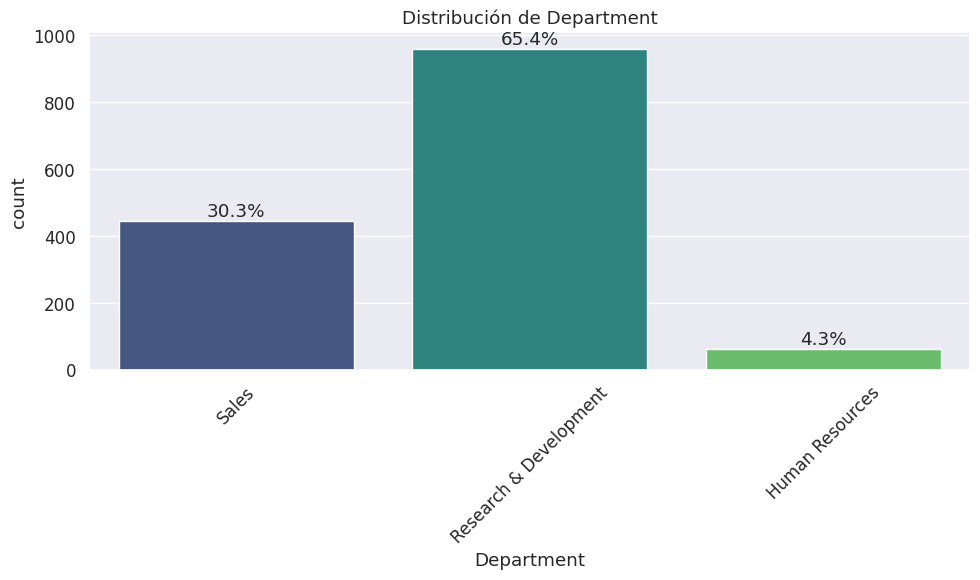

<Figure size 1200x600 with 0 Axes>

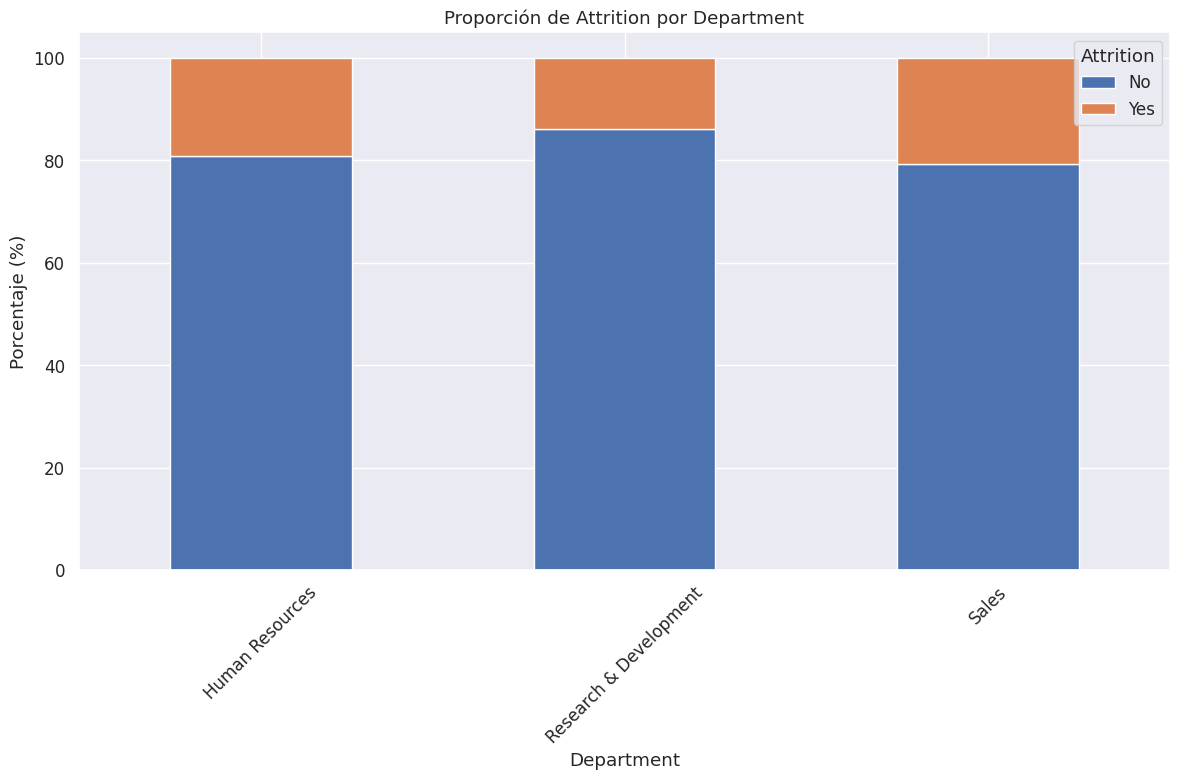


Tabla de frecuencias para EducationField:
     EducationField  Frecuencia  Porcentaje
0     Life Sciences         606   41.224490
1           Medical         464   31.564626
2         Marketing         159   10.816327
3  Technical Degree         132    8.979592
4             Other          82    5.578231
5   Human Resources          27    1.836735


<ipython-input-31-e817daa12177>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette='viridis')


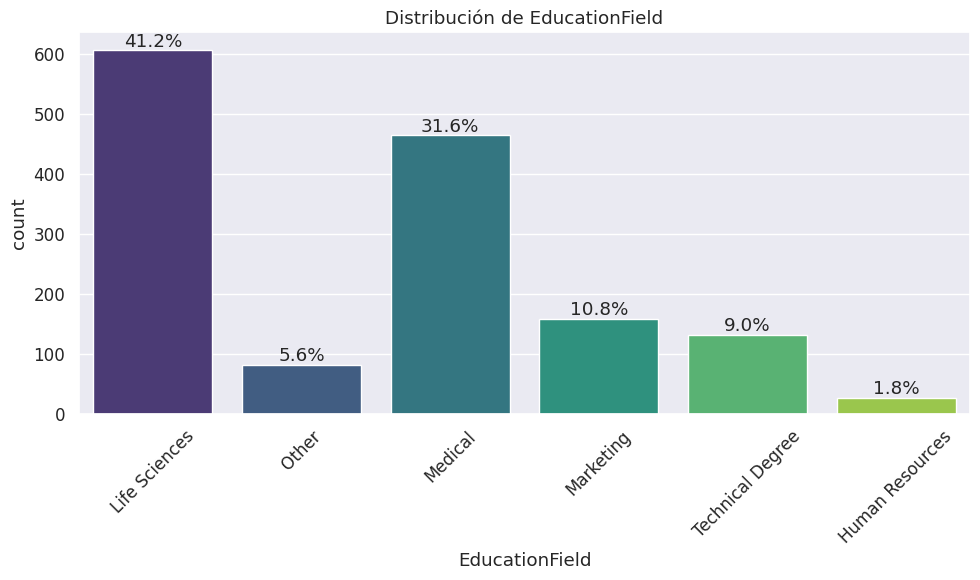

<Figure size 1200x600 with 0 Axes>

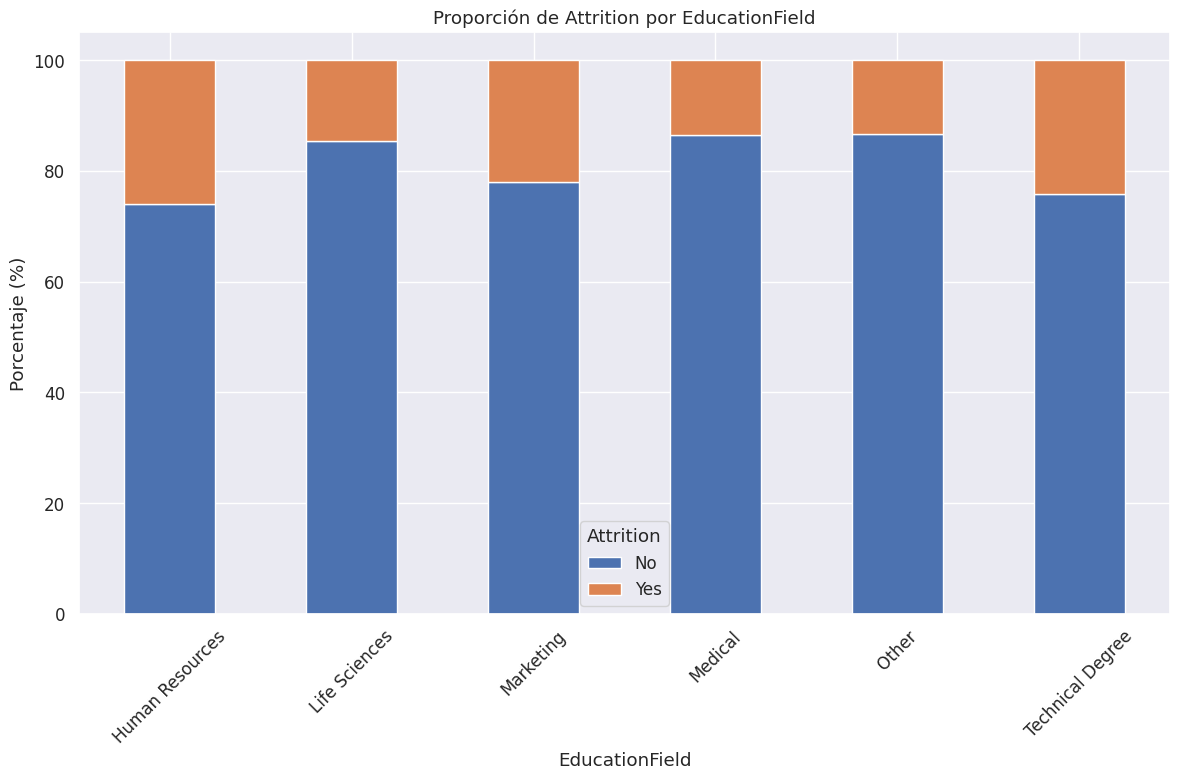


Tabla de frecuencias para Gender:
   Gender  Frecuencia  Porcentaje
0    Male         882        60.0
1  Female         588        40.0


<ipython-input-31-e817daa12177>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette='viridis')


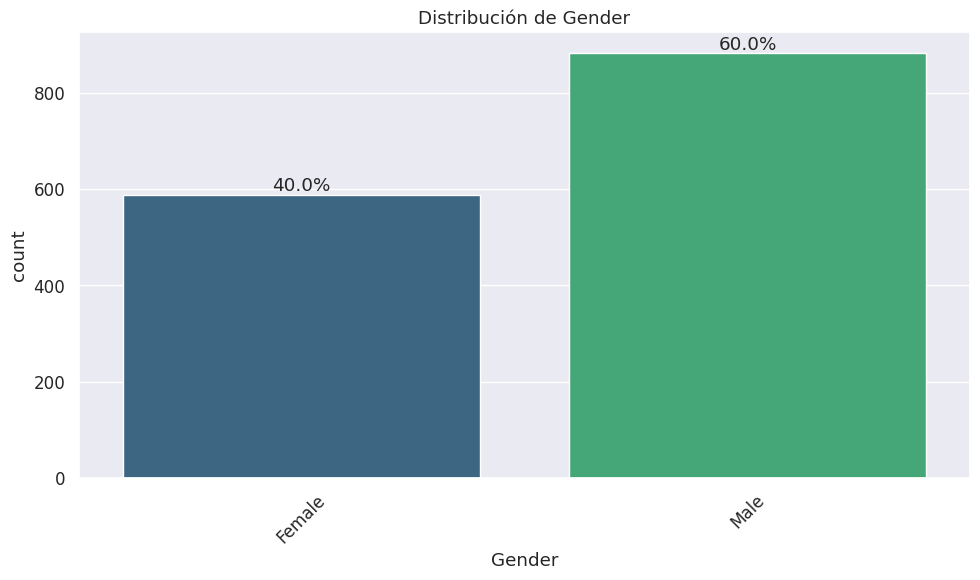

<Figure size 1200x600 with 0 Axes>

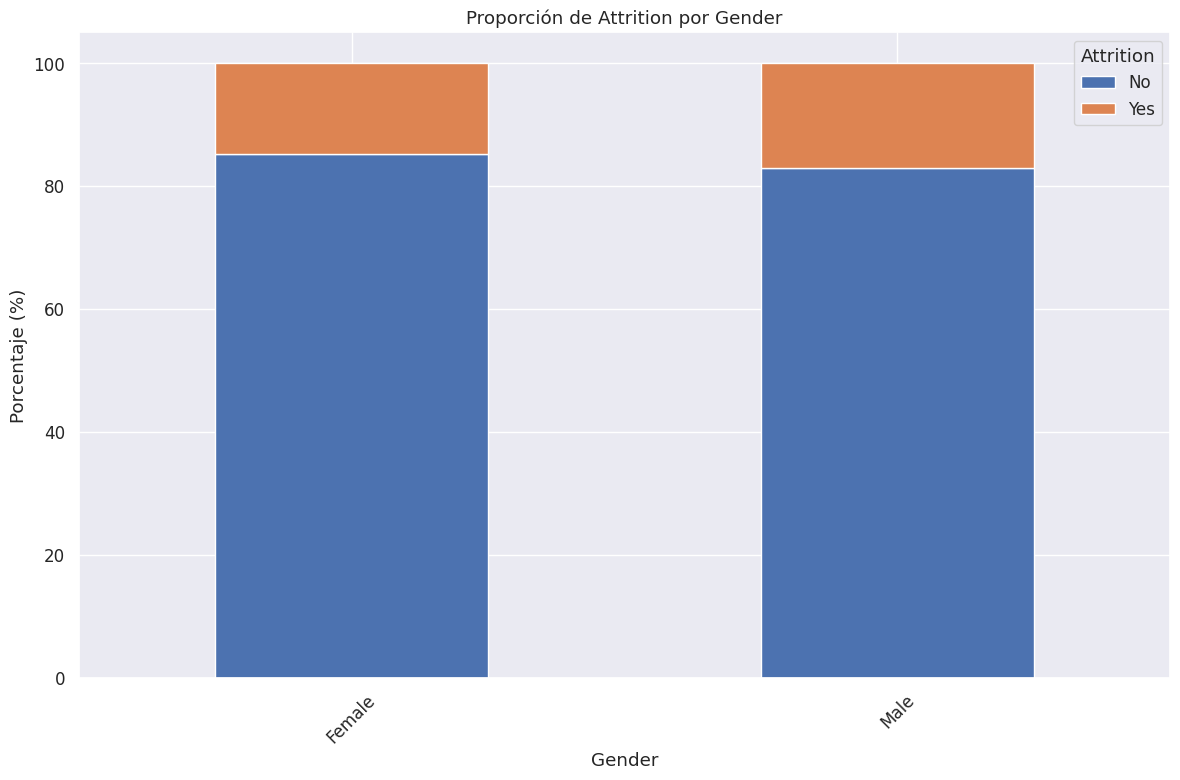


Tabla de frecuencias para JobRole:
                     JobRole  Frecuencia  Porcentaje
0            Sales Executive         326   22.176871
1         Research Scientist         292   19.863946
2      Laboratory Technician         259   17.619048
3     Manufacturing Director         145    9.863946
4  Healthcare Representative         131    8.911565
5                    Manager         102    6.938776
6       Sales Representative          83    5.646259
7          Research Director          80    5.442177
8            Human Resources          52    3.537415


<ipython-input-31-e817daa12177>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette='viridis')


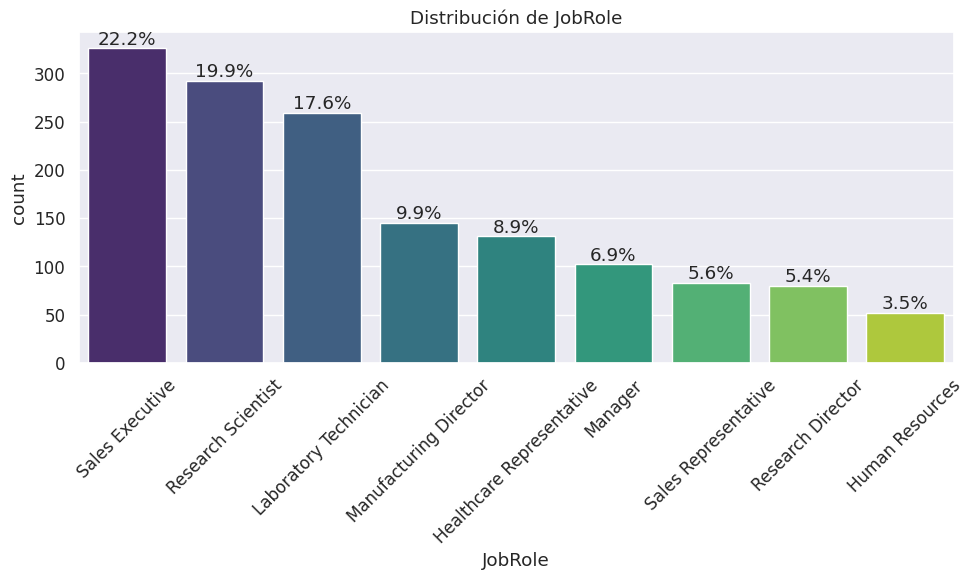

<Figure size 1200x600 with 0 Axes>

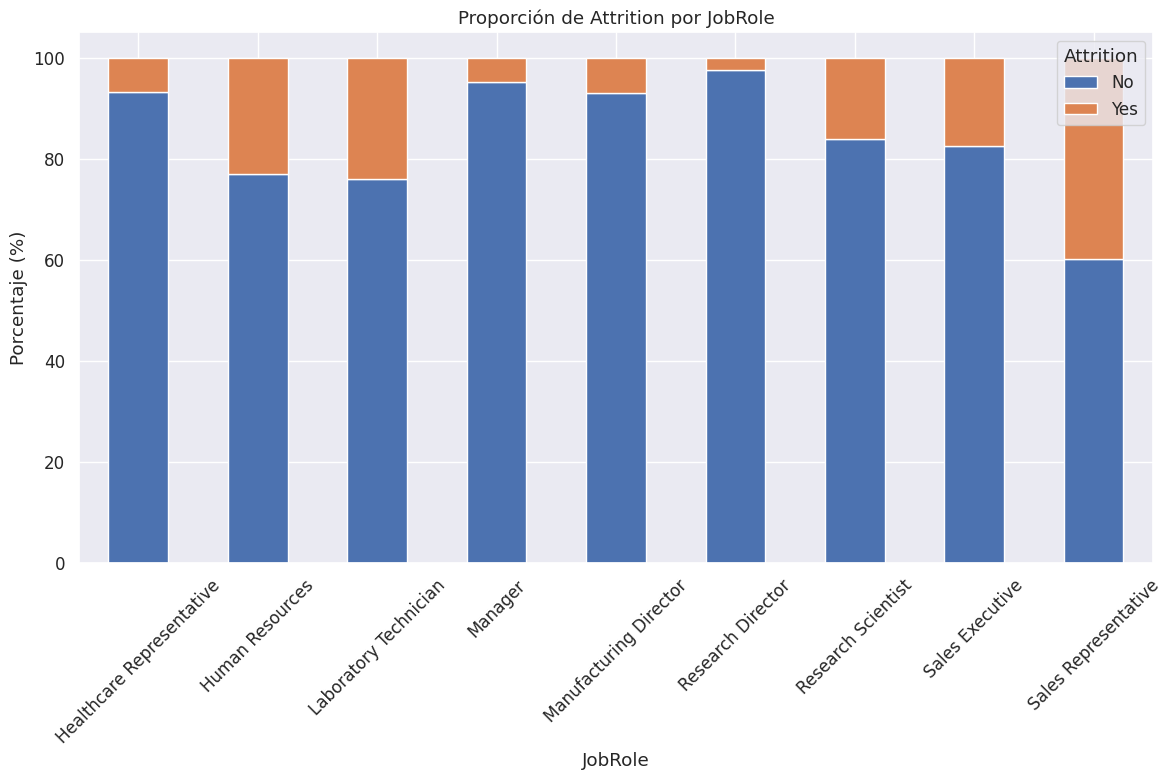


Tabla de frecuencias para MaritalStatus:
  MaritalStatus  Frecuencia  Porcentaje
0       Married         673   45.782313
1        Single         470   31.972789
2      Divorced         327   22.244898


<ipython-input-31-e817daa12177>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette='viridis')


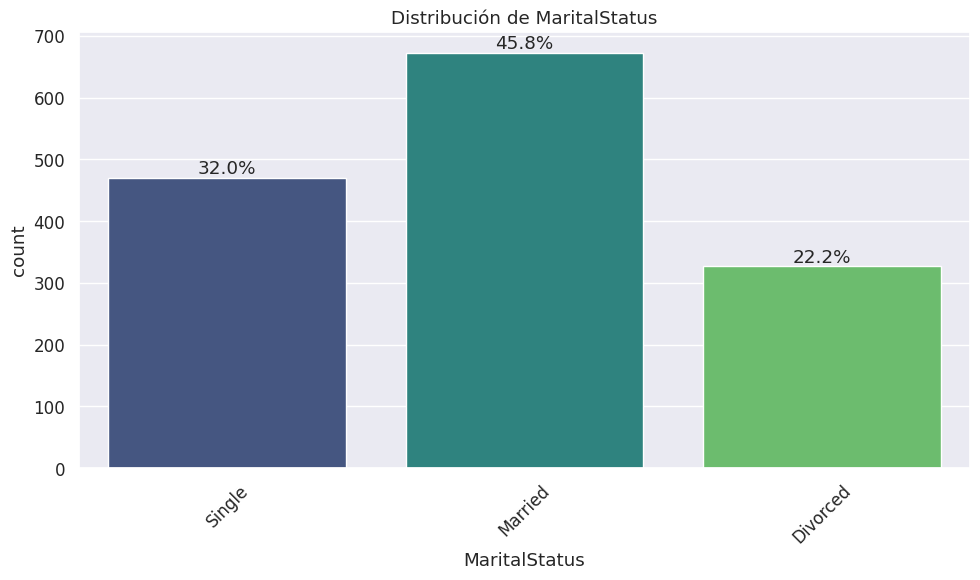

<Figure size 1200x600 with 0 Axes>

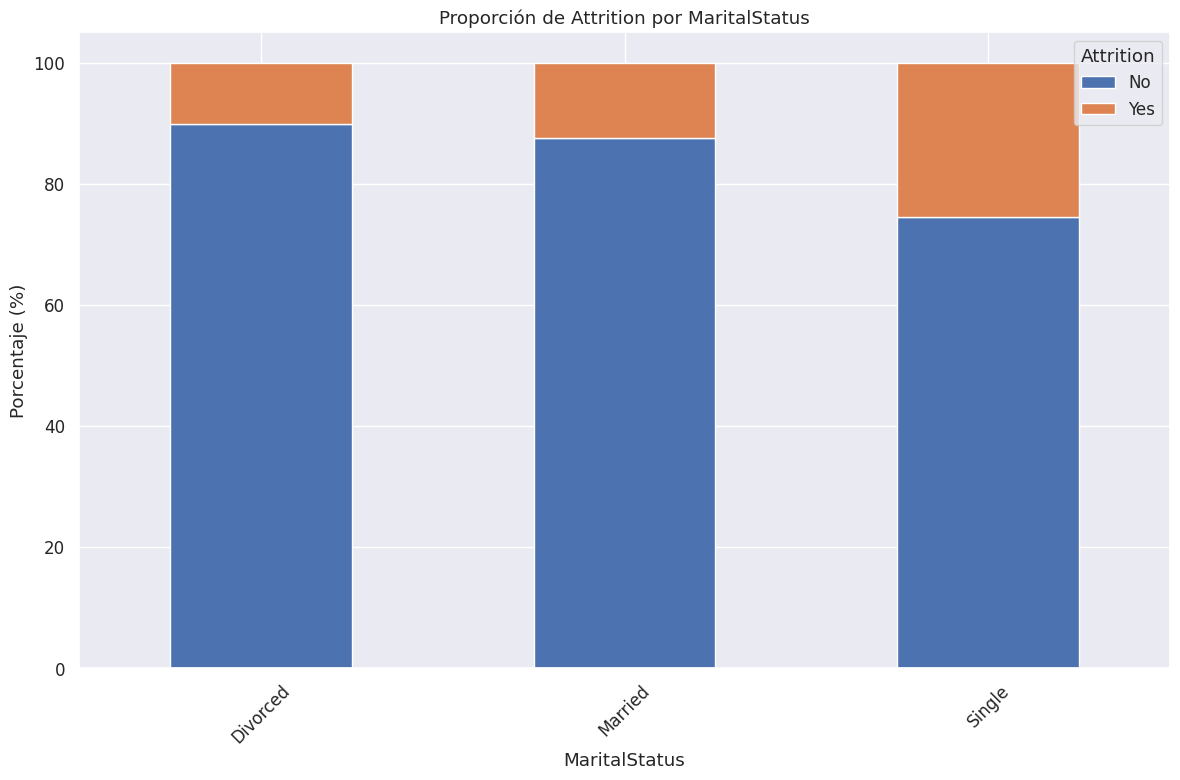


Tabla de frecuencias para Over18:
  Over18  Frecuencia  Porcentaje
0      Y        1470       100.0


<ipython-input-31-e817daa12177>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette='viridis')


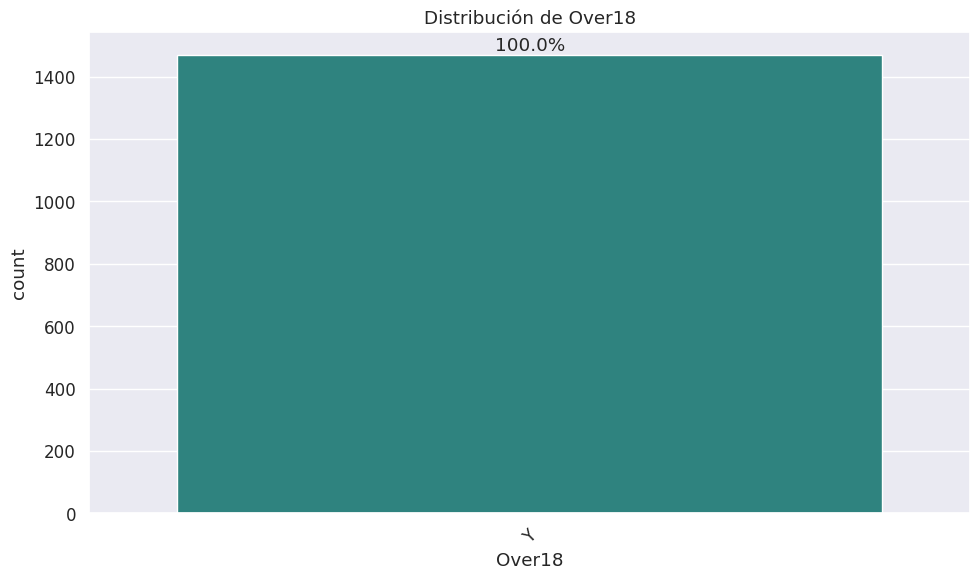

<Figure size 1200x600 with 0 Axes>

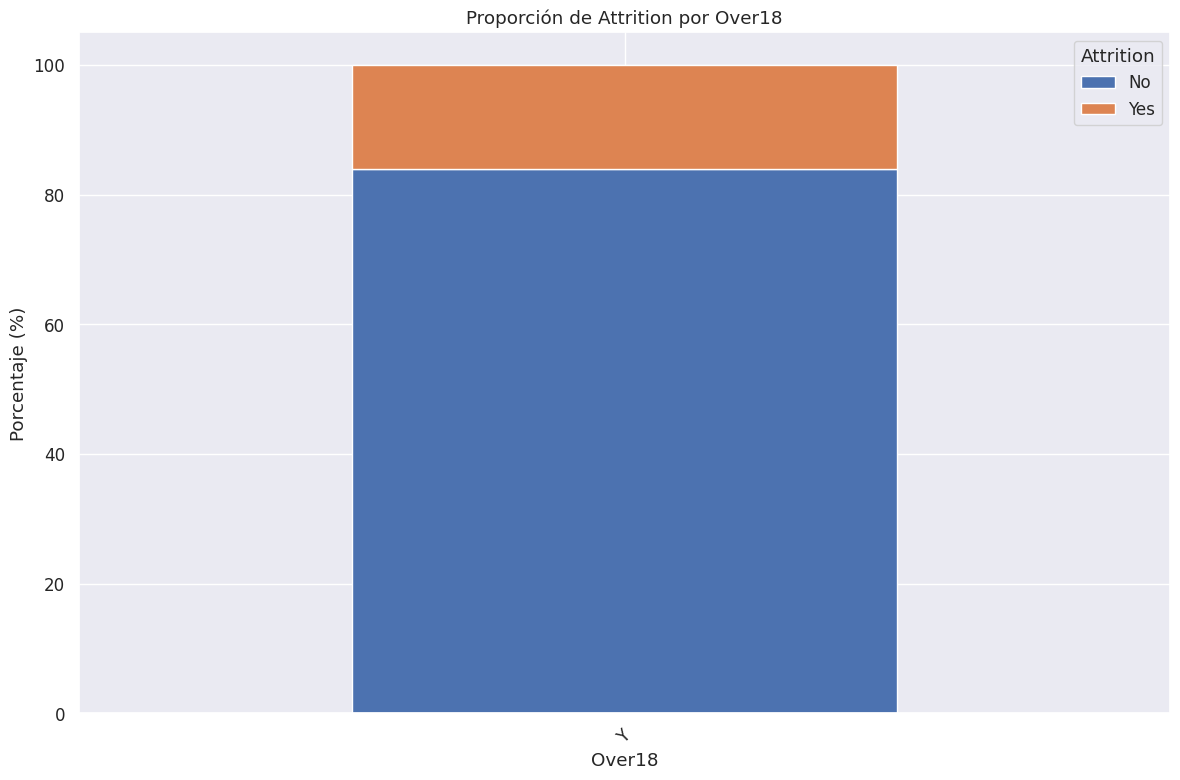


Tabla de frecuencias para OverTime:
  OverTime  Frecuencia  Porcentaje
0       No        1054    71.70068
1      Yes         416    28.29932


<ipython-input-31-e817daa12177>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette='viridis')


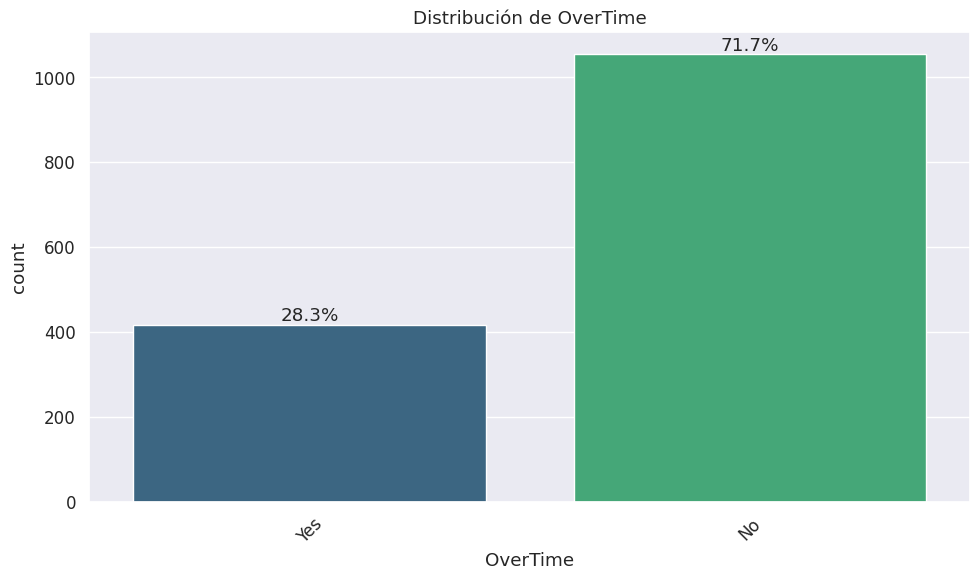

<Figure size 1200x600 with 0 Axes>

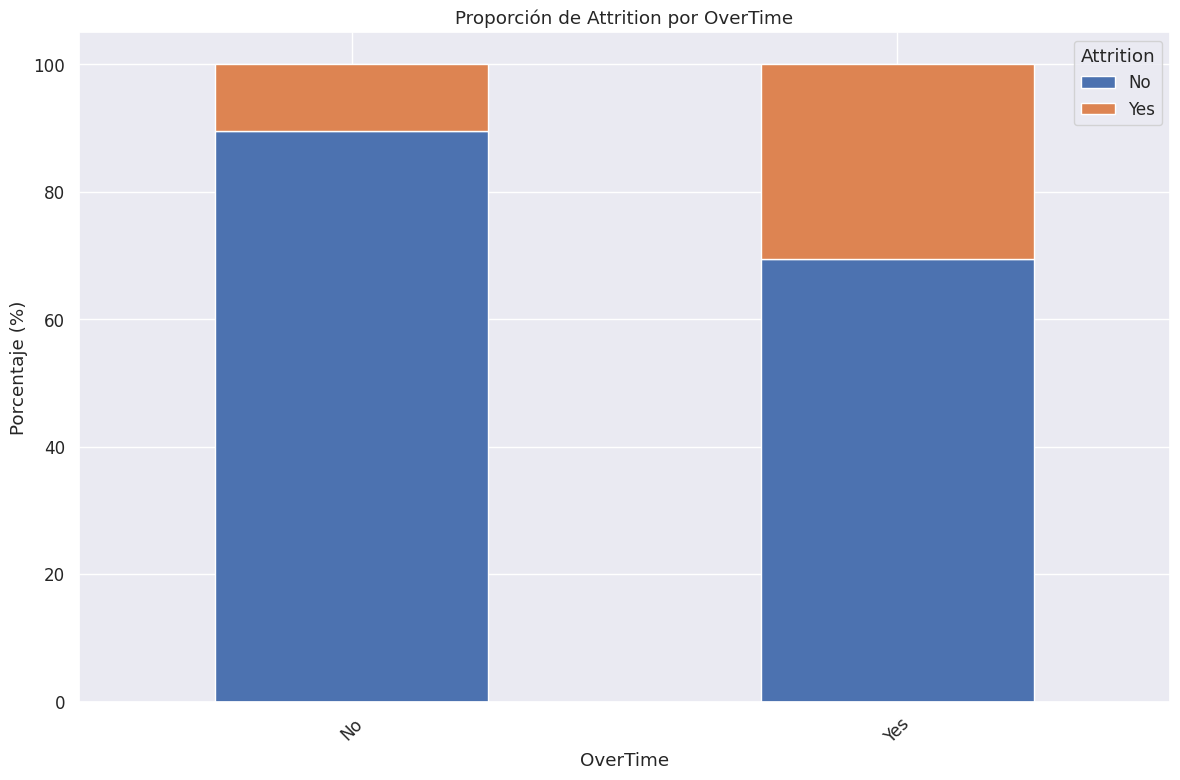

In [31]:
# Tablas de frecuencia y gráficos para variables categóricas
for col in categorical_cols:
    # Tabla de frecuencias
    value_counts = df[col].value_counts().reset_index()
    value_counts.columns = [col, 'Frecuencia']
    value_counts['Porcentaje'] = value_counts['Frecuencia'] / len(df) * 100

    print(f"\nTabla de frecuencias para {col}:")
    print(value_counts)

    # Gráfico de barras
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)

    # Añadir etiquetas de porcentaje
    total = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Análisis cruzado con Attrition
    if col != 'Attrition':
        plt.figure(figsize=(12, 6))
        crosstab = pd.crosstab(df[col], df['Attrition'], normalize='index') * 100
        crosstab.plot(kind='bar', stacked=True)
        plt.title(f'Proporción de Attrition por {col}')
        plt.xlabel(col)
        plt.ylabel('Porcentaje (%)')
        plt.xticks(rotation=45)
        plt.legend(title='Attrition')
        plt.tight_layout()
        plt.show()

ENTENDER DISTRIBUCION DE VARIABLES CATEGORICAS CLAVES

DISTRIBUCION DE EMPLEADOS POR VARIABLES CATGEORICAS

ANALISIS CRUZADO CON ATTRITION

# ** IDENT VALORES ATIPICOS**


Análisis de valores atípicos para MonthlyIncome:
Límite inferior: -5291.00
Límite superior: 16581.00
Número de outliers: 114
Porcentaje de outliers: 7.76%
Valores atípicos más extremos:
     MonthlyIncome Attrition
190          19999        No
746          19973        No
851          19943        No
165          19926        No
568          19859       Yes


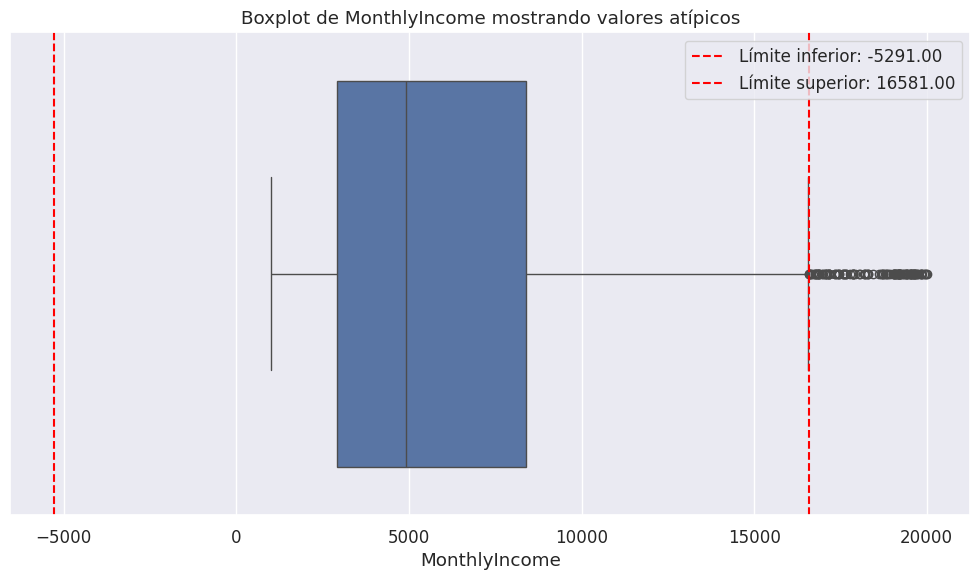


Análisis de valores atípicos para YearsAtCompany:
Límite inferior: -6.00
Límite superior: 18.00
Número de outliers: 104
Porcentaje de outliers: 7.07%
Valores atípicos más extremos:
      YearsAtCompany Attrition
126               40       Yes
98                37        No
270               36        No
1116              36        No
561               34        No


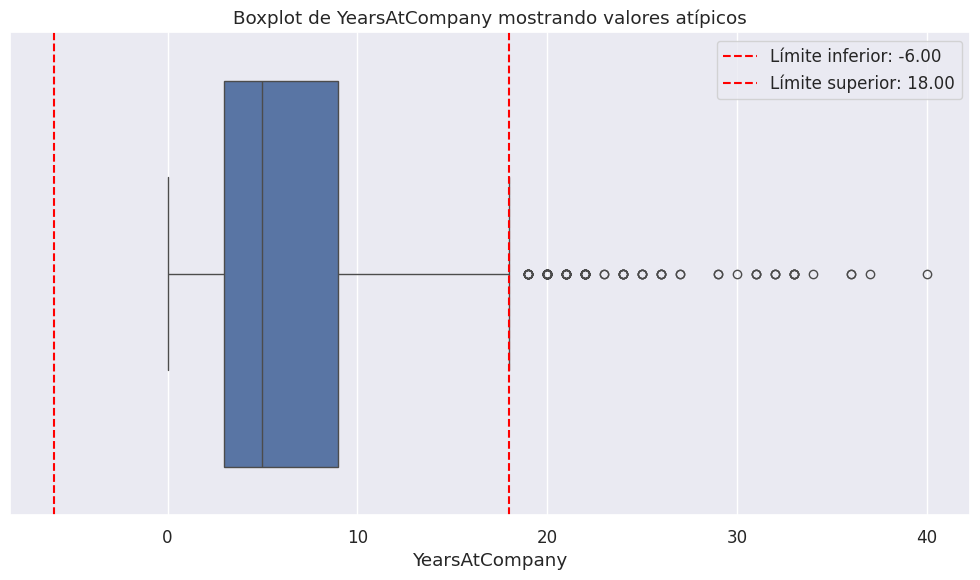


Análisis de valores atípicos para DistanceFromHome:
Límite inferior: -16.00
Límite superior: 32.00
Número de outliers: 0
Porcentaje de outliers: 0.00%


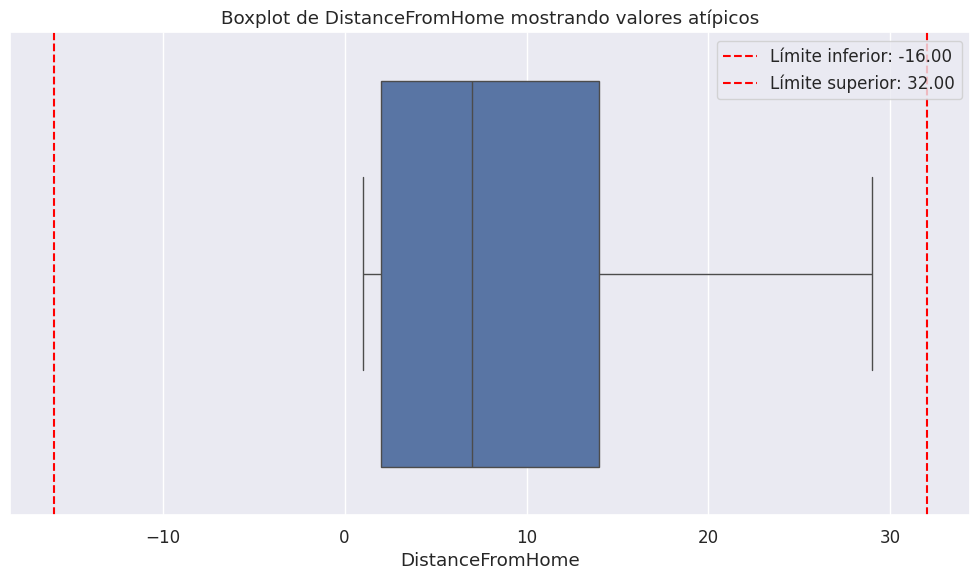


Análisis de valores atípicos para Age:
Límite inferior: 10.50
Límite superior: 62.50
Número de outliers: 0
Porcentaje de outliers: 0.00%


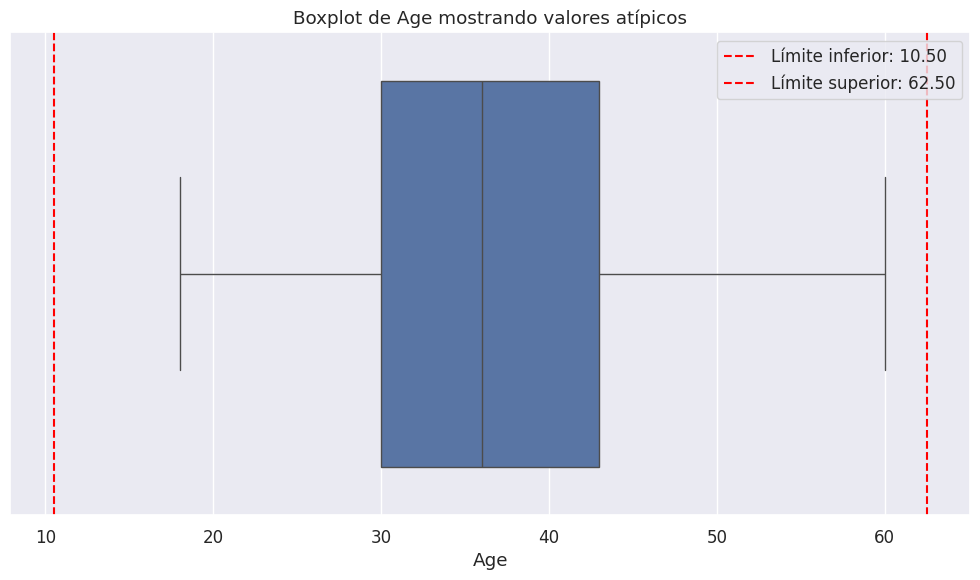

In [30]:
# Función para detectar outliers usando el método IQR
def detect_outliers(df, var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detectar y visualizar outliers para variables clave
key_vars_for_outliers = ['MonthlyIncome', 'YearsAtCompany', 'DistanceFromHome', 'Age']

for var in key_vars_for_outliers:
    outliers, lower, upper = detect_outliers(df, var)

    print(f"\nAnálisis de valores atípicos para {var}:")
    print(f"Límite inferior: {lower:.2f}")
    print(f"Límite superior: {upper:.2f}")
    print(f"Número de outliers: {len(outliers)}")
    print(f"Porcentaje de outliers: {len(outliers)/len(df)*100:.2f}%")

    if len(outliers) > 0:
        # Mostrar algunos outliers extremos
        sorted_outliers = outliers.sort_values(by=var, ascending=False)
        print("Valores atípicos más extremos:")
        print(sorted_outliers[[var, 'Attrition']].head())

    # Boxplot para visualizar outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var} mostrando valores atípicos')
    plt.axvline(x=lower, color='red', linestyle='--', label=f'Límite inferior: {lower:.2f}')
    plt.axvline(x=upper, color='red', linestyle='--', label=f'Límite superior: {upper:.2f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

DETECTAR VALROES ATIPICOS EN VARIABLES CLAVE

VARIABLES CON MAS OUTLIERS

IMPACTO DE LOS OUTLIERS EN LA ROTACION

ANALISIS FINAL

SE IDENTIFICARON PATRONES CLAVE RELACIONADOS CON LAS VARIABLES NUMERICAS, CATEGORIAS Y LA ROTACION (ATTRITION):

ANALISIS ESTADISTICO DESCRIPTIVO:

VARIABLES COMO EDAD, INGRESOS Y AÑOS EN LA EMPRESA MOSTRARON DISTRIBUCIONES ASIMETRICAS


ANALISIS DE ROTACION:

LOS EMPLEADOS CON INGRESOS MAS BAJOS TINENE MAYOR ROTACION.
LOS EMPLEADOS CON MENOS DE 3 AÑOS EN LA EMPRESA SON MAS PROPENSOS A RENUNCIAR.

ANALISIS DE VALORES ATIPICOS:

SE DETECTARON OUTLIERS EN SUELDOS, DISTANCIA AL TRABAJO Y ANTIGUEDAD

CONCLUSION FINAL: ESTE ABALISIS CONFIRMO QUE LA ROTACION (ATTRITION) NO DEPENDE DE UN SOLO FACTOR SINO DE UNA COMBINACION DE SALARIO, DISTANCIA, SATISFACCION LABORAL Y ANTIGUEDAD. IMPLEMENTAR ESTRATEGIAS BASADAS EN ESTOS HALLAZGOS PUEDE AYUDAR A REDUCIR LA ROTACIÓN Y MEJORAR LA RETENCIÓN DEL TALENTO.